In [1]:
import json
import csv
import tweepy
import re
import nltk
from nltk.stem import WordNetLemmatizer
import pandas as pd
import GetOldTweets3 as got
from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import os
from textwrap import wrap
import plotly_express as px

In [2]:
# Set default fontsize and colors for graphs
SMALL_SIZE, MEDIUM_SIZE, BIG_SIZE = 10, 12, 20
plt.rc('font', size=MEDIUM_SIZE)       
plt.rc('axes', titlesize=BIG_SIZE)     
plt.rc('axes', labelsize=MEDIUM_SIZE)  
plt.rc('xtick', labelsize=MEDIUM_SIZE) 
plt.rc('ytick', labelsize=MEDIUM_SIZE) 
plt.rc('legend', fontsize=SMALL_SIZE)  
plt.rc('figure', titlesize=BIG_SIZE)
my_colors = 'rgbkymc'

# Disable scrolling for long output
from IPython.display import display, Javascript
disable_js = """
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}
"""
display(Javascript(disable_js))

<IPython.core.display.Javascript object>

In [3]:
df=pd.read_csv('final_bitsp.csv')
wn = nltk.WordNetLemmatizer()
df=df.drop(columns="Unnamed: 0")
df

,Tweet_text,date,username,retweets,hashtags,uni_handle,compound,Sentiment
0,"Let’s hope for the best, ayina BITS Pilani gra...",2020-06-18 15:03:10+00:00,IronMan24124112,0,NaN,0.0,0.9062,Positive
1,In these unprecedented times when Virtual Conv...,2020-06-18 10:58:30+00:00,CriticalRiver,0,#criticalriver #criticalrivercare #bitspilani ...,0.0,0.0000,Neutral
2,Dear BITSians Join us for the webinar on Build...,2020-06-18 10:24:02+00:00,BITSAA,0,NaN,0.0,0.8074,Positive
3,"""My parents always keep fighting with each oth...",2020-06-18 08:42:41+00:00,FessionsBrown,0,NaN,0.0,-0.8830,Negative
4,Convocation Time? 6 Life Lessons that helped m...,2020-06-18 08:16:23+00:00,AnjiMaram,0,#Classof2020 #Graduation2020,0.0,0.9124,Positive
5,@BITSAA Dear BITSians Thanks for registering f...,2020-06-18 05:34:53+00:00,guptakailash,3,NaN,0.0,0.8402,Positive
6,"BITS pilani has that system , it's called 'Pra...",2020-06-18 04:45:23+00:00,Rishab_kabdi,0,NaN,0.0,0.0000,Neutral
7,ISCB Pilani Chapter invited you to join virtua...,2020-06-18 01:42:05+00:00,bitspilaniindia,1,#BITSPilani #virtualconference #webinar,1.0,0.6705,Positive
8,"With the habit of wearing masks, bachelors can...",2020-06-17 22:13:39+00:00,Pun_paliaKishan,0,#COVID #COVID19 #bachelor #teenager #college #...,0.0,0.0000,Neutral
9,@BITS_Pilani already does something like this.,2020-06-17 18:34:10+00:00,muralipiyer,0,NaN,0.0,0.3612,Positive


In [4]:
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2521 entries, 0 to 2520
Data columns (total 8 columns):
Tweet_text    2521 non-null object
date          2521 non-null object
username      2521 non-null object
retweets      2521 non-null int64
hashtags      865 non-null object
uni_handle    2521 non-null float64
compound      2521 non-null float64
Sentiment     2521 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 177.3+ KB


In [5]:
df['timestamp'] = pd.to_datetime(df['date'], infer_datetime_format = "%d/%m/%Y", utc  = False)

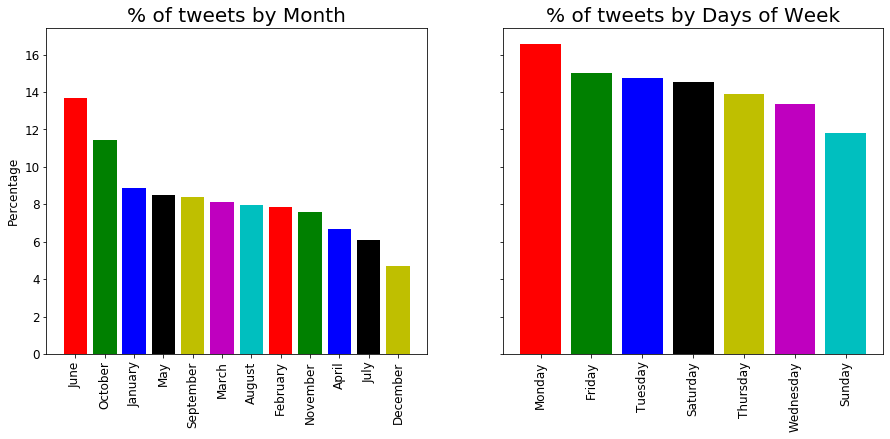

In [6]:
fig, [axes1, axes2] = plt.subplots(1, 2, figsize=(15,6), sharey=True)
df["monthName"] = df.timestamp.dt.month_name()
data = df["monthName"].value_counts(normalize=True)

axes1.bar(data.index, data*100, color=my_colors)
axes1.set_xticklabels(data.index, rotation=90)
axes1.set_ylabel('Percentage')
axes1.set_title('% of tweets by Month')

df["dayName"] = df.timestamp.dt.day_name()
data = df["dayName"].value_counts(normalize=True)
axes2.bar(data.index, data*100, color=my_colors)
axes2.set_xticklabels(data.index, rotation=90)
axes2.set_title('% of tweets by Days of Week')

plt.show()

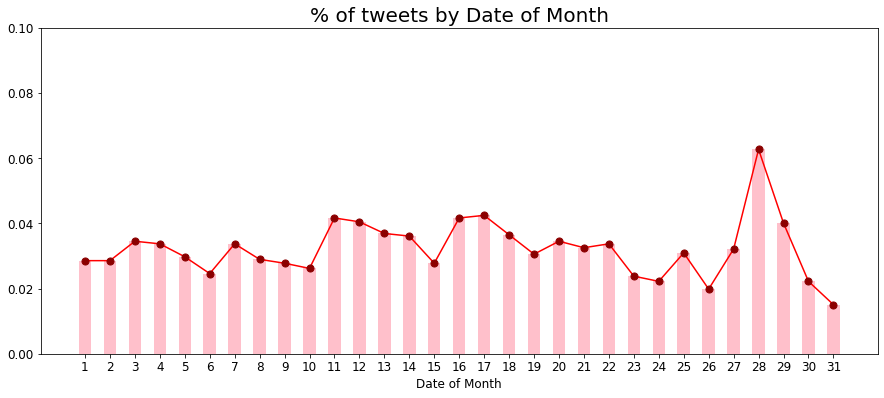

In [7]:
fig, axes = plt.subplots(figsize=(15,6))
df["dayOfMonth"] = df.timestamp.dt.day
data = df["dayOfMonth"].value_counts(normalize=True).sort_index()
axes.bar(data.index, data, color='pink', width=0.5, zorder=0)
axes.plot(data.index, data, color='red', zorder=1)
axes.scatter(data.index, data, s=50, color='darkred', zorder=2)

axes.set_xlabel('Date of Month')
axes.set_xticks(np.arange(1, 32))
axes.set_xticklabels([str(val) for val in np.arange(1, 32)])
axes.set_ylim(0, 0.1)
axes.set_title('% of tweets by Date of Month')

plt.show()

In [9]:
import string
def clean_text(text):
    text_lc = "".join([word.lower() for word in text if word not in string.punctuation]) # remove puntuation
    text_rc = re.sub('[0-9]+', '', text_lc)
    nopunc = re.sub('((www\.[^\s]+)|(https?://[^\s]+)|(http?://[^\s]+))', '', text_rc) #remove urls
    nopunc = re.sub(r'http\S+', '', nopunc) #remove usernames
    nopunc = re.sub(r'#([^\s]+)', r'\1', nopunc) #remove hashtags
    nopunc= re.sub(r'(.)\1+', r'\1\1', nopunc)  #remove repeating characters 
    tokens = re.split('\W+', nopunc)    # tokenization
    text = [word for word in tokens if word not in stopwords]  # remove stopwords and stemming
    return text
df['Text_cleaned'] = df['Tweet_text'].apply(lambda x: clean_text(x))

In [10]:
def lemmatizer(text):
    text = [wn.lemmatize(word) for word in text]
    return text
df['Text_lemmatized'] = df['Text_cleaned'].apply(lambda x: lemmatizer(x))

def listtostr(s):
    str1=" "
    return (str1.join(s))
df['Text_lemmatized_str'] = df['Text_lemmatized'].apply(lambda x: listtostr(x))
df.head()

,Tweet_text,date,username,retweets,hashtags,uni_handle,compound,Sentiment,timestamp,monthName,dayName,dayOfMonth,Text_cleaned,Text_lemmatized,Text_lemmatized_str
0,"Let’s hope for the best, ayina BITS Pilani gra...",2020-06-18 15:03:10+00:00,IronMan24124112,0,NaN,0.0,0.9062,Positive,2020-06-18 15:03:10+00:00,June,Thursday,18,"[let, hope, best, ayina, bits, pilani, graduat...","[let, hope, best, ayina, bit, pilani, graduate...",let hope best ayina bit pilani graduate manchi...
1,In these unprecedented times when Virtual Conv...,2020-06-18 10:58:30+00:00,CriticalRiver,0,#criticalriver #criticalrivercare #bitspilani ...,0.0,0.0000,Neutral,2020-06-18 10:58:30+00:00,June,Thursday,18,"[unprecedented, times, virtual, convocations, ...","[unprecedented, time, virtual, convocation, ta...",unprecedented time virtual convocation taking ...
2,Dear BITSians Join us for the webinar on Build...,2020-06-18 10:24:02+00:00,BITSAA,0,NaN,0.0,0.8074,Positive,2020-06-18 10:24:02+00:00,June,Thursday,18,"[dear, bitsians, join, us, webinar, building, ...","[dear, bitsians, join, u, webinar, building, f...",dear bitsians join u webinar building future p...
3,"""My parents always keep fighting with each oth...",2020-06-18 08:42:41+00:00,FessionsBrown,0,NaN,0.0,-0.8830,Negative,2020-06-18 08:42:41+00:00,June,Thursday,18,"[parents, always, keep, fighting, maybe, used,...","[parent, always, keep, fighting, maybe, used, ...",parent always keep fighting maybe used lockdow...
4,Convocation Time? 6 Life Lessons that helped m...,2020-06-18 08:16:23+00:00,AnjiMaram,0,#Classof2020 #Graduation2020,0.0,0.9124,Positive,2020-06-18 08:16:23+00:00,June,Thursday,18,"[convocation, time, life, lessons, helped, lot...","[convocation, time, life, lesson, helped, lot,...",convocation time life lesson helped lot wish y...


In [11]:
pos_df = df[df.Sentiment == 'Positive']
neg_df = df[df.Sentiment == 'Negative']
neu_df = df[df.Sentiment == 'Neutral']

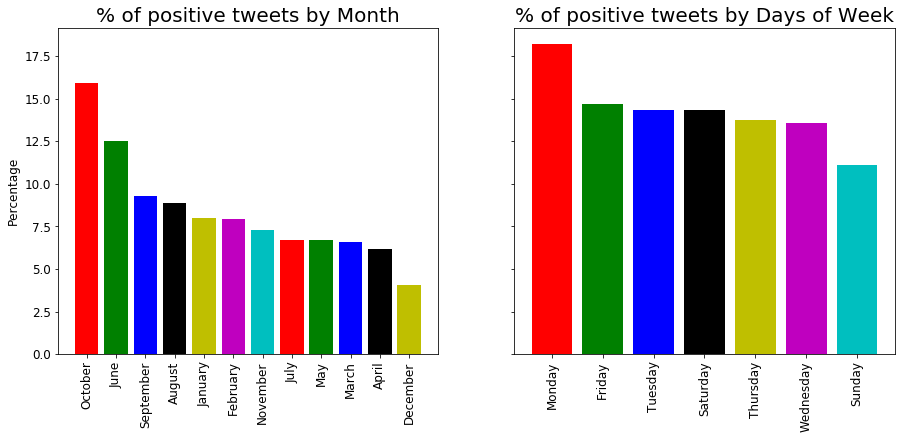

In [12]:
fig, [axes1, axes2] = plt.subplots(1, 2, figsize=(15,6), sharey=True)
data = pos_df["monthName"].value_counts(normalize=True)

axes1.bar(data.index, data*100, color=my_colors)
axes1.set_xticklabels(data.index, rotation=90)
axes1.set_ylabel('Percentage')
axes1.set_title('% of positive tweets by Month')

data = pos_df["dayName"].value_counts(normalize=True)
axes2.bar(data.index, data*100, color=my_colors)
axes2.set_xticklabels(data.index, rotation=90)
axes2.set_title('% of positive tweets by Days of Week')

plt.show()

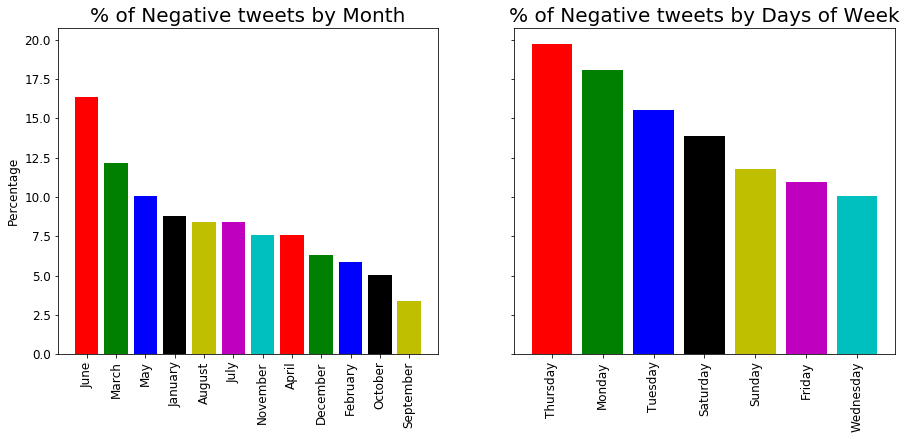

In [13]:
fig, [axes1, axes2] = plt.subplots(1, 2, figsize=(15,6), sharey=True)
data = neg_df["monthName"].value_counts(normalize=True)

axes1.bar(data.index, data*100, color=my_colors)
axes1.set_xticklabels(data.index, rotation=90)
axes1.set_ylabel('Percentage')
axes1.set_title('% of Negative tweets by Month')

data = neg_df["dayName"].value_counts(normalize=True)
axes2.bar(data.index, data*100, color=my_colors)
axes2.set_xticklabels(data.index, rotation=90)
axes2.set_title('% of Negative tweets by Days of Week')

plt.show()

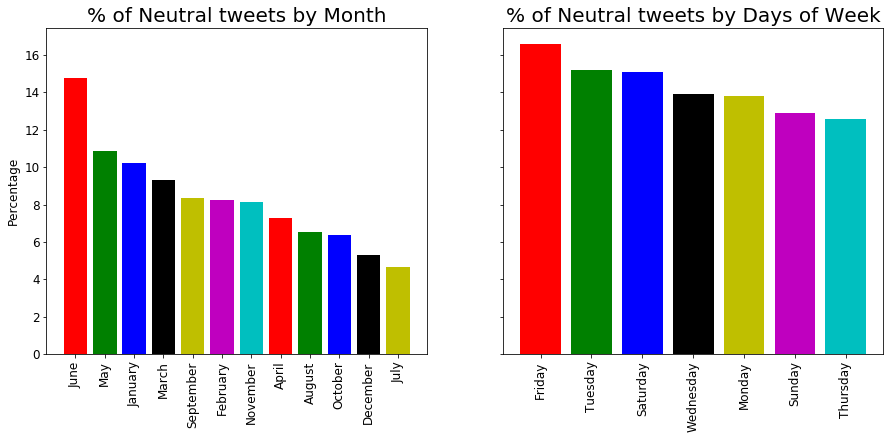

In [14]:
fig, [axes1, axes2] = plt.subplots(1, 2, figsize=(15,6), sharey=True)
data = neu_df["monthName"].value_counts(normalize=True)

axes1.bar(data.index, data*100, color=my_colors)
axes1.set_xticklabels(data.index, rotation=90)
axes1.set_ylabel('Percentage')
axes1.set_title('% of Neutral tweets by Month')

data = neu_df["dayName"].value_counts(normalize=True)
axes2.bar(data.index, data*100, color=my_colors)
axes2.set_xticklabels(data.index, rotation=90)
axes2.set_title('% of Neutral tweets by Days of Week')

plt.show()

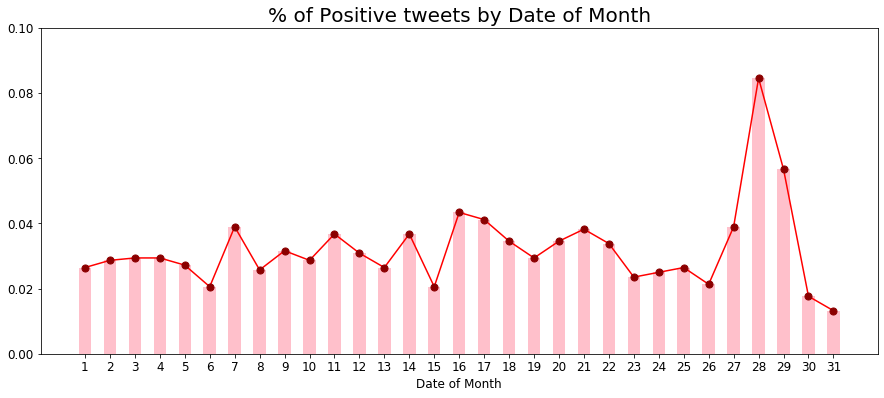

In [15]:
fig, axes = plt.subplots(figsize=(15,6))
data = pos_df["dayOfMonth"].value_counts(normalize=True).sort_index()
axes.bar(data.index, data, color='pink', width=0.5, zorder=0)
axes.plot(data.index, data, color='red', zorder=1)
axes.scatter(data.index, data, s=50, color='darkred', zorder=2)

axes.set_xlabel('Date of Month')
axes.set_xticks(np.arange(1, 32))
axes.set_xticklabels([str(val) for val in np.arange(1, 32)])
axes.set_ylim(0, 0.1)
axes.set_title('% of Positive tweets by Date of Month')

plt.show()

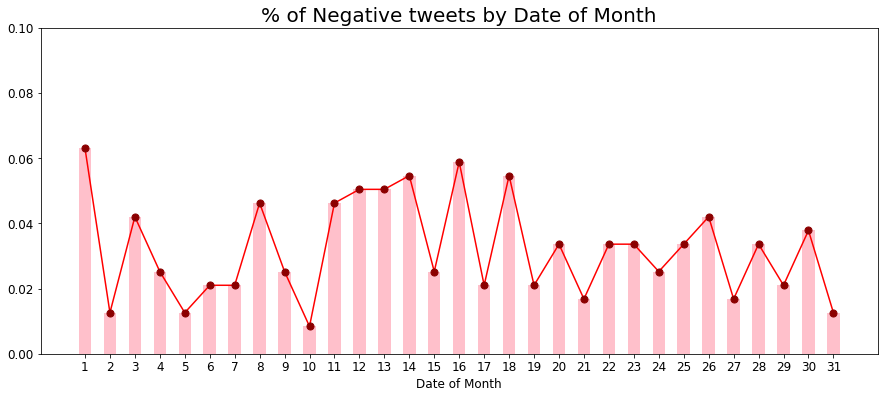

In [16]:
fig, axes = plt.subplots(figsize=(15,6))
data = neg_df["dayOfMonth"].value_counts(normalize=True).sort_index()
axes.bar(data.index, data, color='pink', width=0.5, zorder=0)
axes.plot(data.index, data, color='red', zorder=1)
axes.scatter(data.index, data, s=50, color='darkred', zorder=2)

axes.set_xlabel('Date of Month')
axes.set_xticks(np.arange(1, 32))
axes.set_xticklabels([str(val) for val in np.arange(1, 32)])
axes.set_ylim(0, 0.1)
axes.set_title('% of Negative tweets by Date of Month')

plt.show()

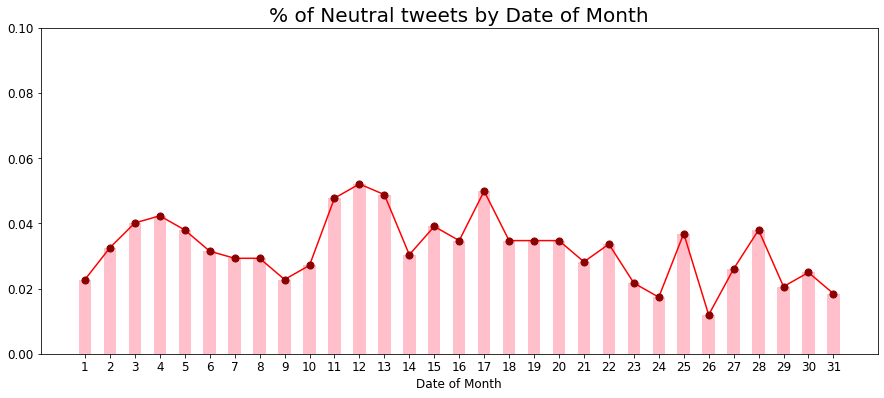

In [17]:
fig, axes = plt.subplots(figsize=(15,6))
data = neu_df["dayOfMonth"].value_counts(normalize=True).sort_index()
axes.bar(data.index, data, color='pink', width=0.5, zorder=0)
axes.plot(data.index, data, color='red', zorder=1)
axes.scatter(data.index, data, s=50, color='darkred', zorder=2)

axes.set_xlabel('Date of Month')
axes.set_xticks(np.arange(1, 32))
axes.set_xticklabels([str(val) for val in np.arange(1, 32)])
axes.set_ylim(0, 0.1)
axes.set_title('% of Neutral tweets by Date of Month')

plt.show()

In [18]:
df["year"] = df.timestamp.dt.year
df_2019=df[df.year==2019]
df_2020=df[df.year==2020]
df

,Tweet_text,date,username,retweets,hashtags,uni_handle,compound,Sentiment,timestamp,monthName,dayName,dayOfMonth,Text_cleaned,Text_lemmatized,Text_lemmatized_str,year
0,"Let’s hope for the best, ayina BITS Pilani gra...",2020-06-18 15:03:10+00:00,IronMan24124112,0,NaN,0.0,0.9062,Positive,2020-06-18 15:03:10+00:00,June,Thursday,18,"[let, hope, best, ayina, bits, pilani, graduat...","[let, hope, best, ayina, bit, pilani, graduate...",let hope best ayina bit pilani graduate manchi...,2020
1,In these unprecedented times when Virtual Conv...,2020-06-18 10:58:30+00:00,CriticalRiver,0,#criticalriver #criticalrivercare #bitspilani ...,0.0,0.0000,Neutral,2020-06-18 10:58:30+00:00,June,Thursday,18,"[unprecedented, times, virtual, convocations, ...","[unprecedented, time, virtual, convocation, ta...",unprecedented time virtual convocation taking ...,2020
2,Dear BITSians Join us for the webinar on Build...,2020-06-18 10:24:02+00:00,BITSAA,0,NaN,0.0,0.8074,Positive,2020-06-18 10:24:02+00:00,June,Thursday,18,"[dear, bitsians, join, us, webinar, building, ...","[dear, bitsians, join, u, webinar, building, f...",dear bitsians join u webinar building future p...,2020
3,"""My parents always keep fighting with each oth...",2020-06-18 08:42:41+00:00,FessionsBrown,0,NaN,0.0,-0.8830,Negative,2020-06-18 08:42:41+00:00,June,Thursday,18,"[parents, always, keep, fighting, maybe, used,...","[parent, always, keep, fighting, maybe, used, ...",parent always keep fighting maybe used lockdow...,2020
4,Convocation Time? 6 Life Lessons that helped m...,2020-06-18 08:16:23+00:00,AnjiMaram,0,#Classof2020 #Graduation2020,0.0,0.9124,Positive,2020-06-18 08:16:23+00:00,June,Thursday,18,"[convocation, time, life, lessons, helped, lot...","[convocation, time, life, lesson, helped, lot,...",convocation time life lesson helped lot wish y...,2020
5,@BITSAA Dear BITSians Thanks for registering f...,2020-06-18 05:34:53+00:00,guptakailash,3,NaN,0.0,0.8402,Positive,2020-06-18 05:34:53+00:00,June,Thursday,18,"[bitsaa, dear, bitsians, thanks, registering, ...","[bitsaa, dear, bitsians, thanks, registering, ...",bitsaa dear bitsians thanks registering webina...,2020
6,"BITS pilani has that system , it's called 'Pra...",2020-06-18 04:45:23+00:00,Rishab_kabdi,0,NaN,0.0,0.0000,Neutral,2020-06-18 04:45:23+00:00,June,Thursday,18,"[bits, pilani, system, called, practice, schoo...","[bit, pilani, system, called, practice, school, ]",bit pilani system called practice school,2020
7,ISCB Pilani Chapter invited you to join virtua...,2020-06-18 01:42:05+00:00,bitspilaniindia,1,#BITSPilani #virtualconference #webinar,1.0,0.6705,Positive,2020-06-18 01:42:05+00:00,June,Thursday,18,"[iscb, pilani, chapter, invited, join, virtual...","[iscb, pilani, chapter, invited, join, virtual...",iscb pilani chapter invited join virtual confe...,2020
8,"With the habit of wearing masks, bachelors can...",2020-06-17 22:13:39+00:00,Pun_paliaKishan,0,#COVID #COVID19 #bachelor #teenager #college #...,0.0,0.0000,Neutral,2020-06-17 22:13:39+00:00,June,Wednesday,17,"[habit, wearing, masks, bachelors, live, witho...","[habit, wearing, mask, bachelor, live, without...",habit wearing mask bachelor live without bath ...,2020
9,@BITS_Pilani already does something like this.,2020-06-17 18:34:10+00:00,muralipiyer,0,NaN,0.0,0.3612,Positive,2020-06-17 18:34:10+00:00,June,Wednesday,17,"[bitspilani, already, something, like]","[bitspilani, already, something, like]",bitspilani already something like,2020


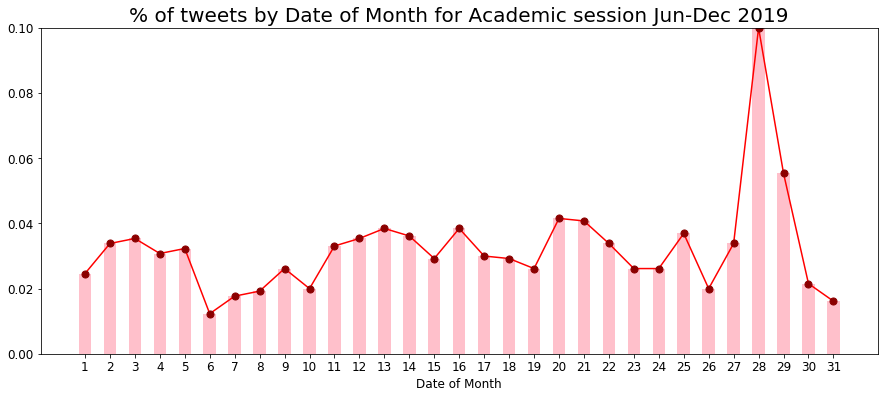

In [19]:
fig, axes = plt.subplots(figsize=(15,6))

data = df_2019["dayOfMonth"].value_counts(normalize=True).sort_index()
axes.bar(data.index, data, color='pink', width=0.5, zorder=0)
axes.plot(data.index, data, color='red', zorder=1)
axes.scatter(data.index, data, s=50, color='darkred', zorder=2)

axes.set_xlabel('Date of Month')
axes.set_xticks(np.arange(1, 32))
axes.set_xticklabels([str(val) for val in np.arange(1, 32)])
axes.set_ylim(0, 0.1)
axes.set_title('% of tweets by Date of Month for Academic session Jun-Dec 2019')

plt.show()

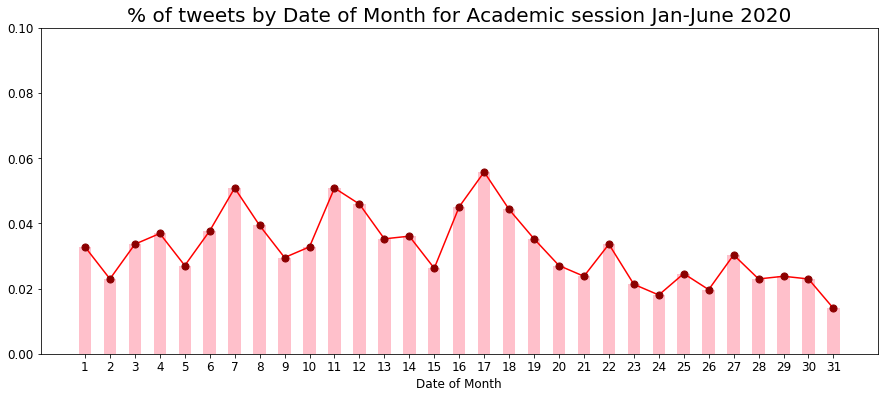

In [20]:
fig, axes = plt.subplots(figsize=(15,6))

data = df_2020["dayOfMonth"].value_counts(normalize=True).sort_index()
axes.bar(data.index, data, color='pink', width=0.5, zorder=0)
axes.plot(data.index, data, color='red', zorder=1)
axes.scatter(data.index, data, s=50, color='darkred', zorder=2)

axes.set_xlabel('Date of Month')
axes.set_xticks(np.arange(1, 32))
axes.set_xticklabels([str(val) for val in np.arange(1, 32)])
axes.set_ylim(0, 0.1)
axes.set_title('% of tweets by Date of Month for Academic session Jan-June 2020')

plt.show()

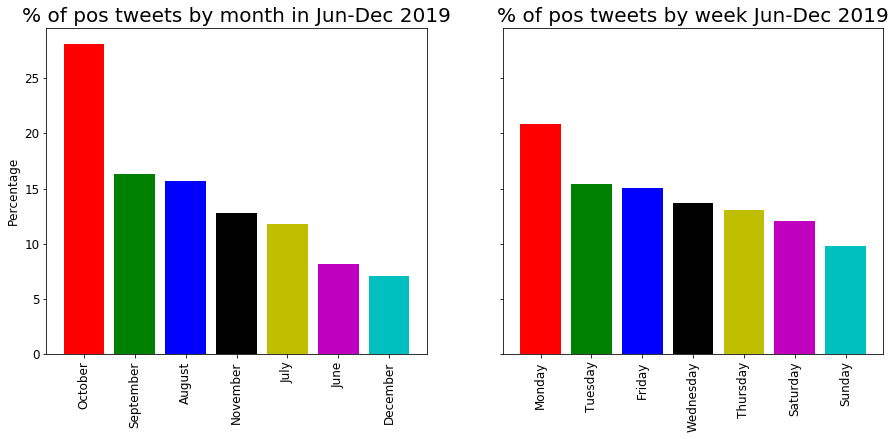

In [21]:
fig, [axes1, axes2] = plt.subplots(1, 2, figsize=(15,6), sharey=True)
pos_2019 = df_2019[df_2019.Sentiment == 'Positive']
data = pos_2019["monthName"].value_counts(normalize=True)

axes1.bar(data.index, data*100, color=my_colors)
axes1.set_xticklabels(data.index, rotation=90)
axes1.set_ylabel('Percentage')
axes1.set_title('% of pos tweets by month in Jun-Dec 2019')

data = pos_2019["dayName"].value_counts(normalize=True)
axes2.bar(data.index, data*100, color=my_colors)
axes2.set_xticklabels(data.index, rotation=90)
axes2.set_title('% of pos tweets by week Jun-Dec 2019')

plt.show()

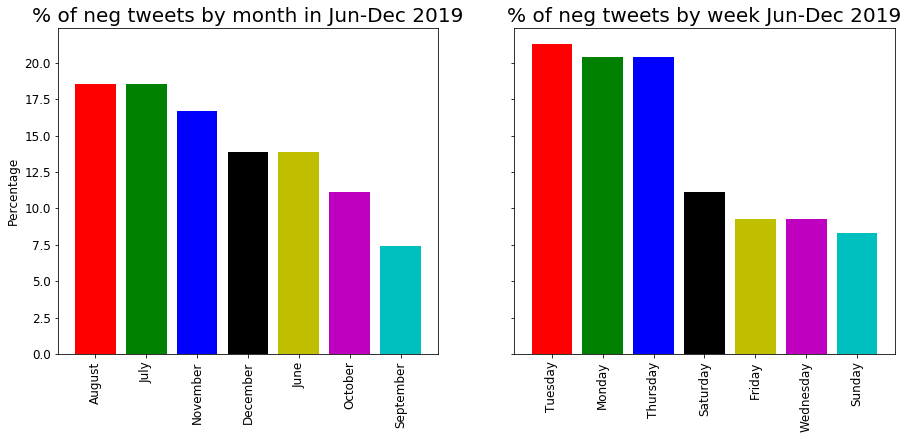

In [22]:
fig, [axes1, axes2] = plt.subplots(1, 2, figsize=(15,6), sharey=True)
neg_2019 = df_2019[df_2019.Sentiment == 'Negative']
data = neg_2019["monthName"].value_counts(normalize=True)

axes1.bar(data.index, data*100, color=my_colors)
axes1.set_xticklabels(data.index, rotation=90)
axes1.set_ylabel('Percentage')
axes1.set_title('% of neg tweets by month in Jun-Dec 2019')

data = neg_2019["dayName"].value_counts(normalize=True)
axes2.bar(data.index, data*100, color=my_colors)
axes2.set_xticklabels(data.index, rotation=90)
axes2.set_title('% of neg tweets by week Jun-Dec 2019')

plt.show()

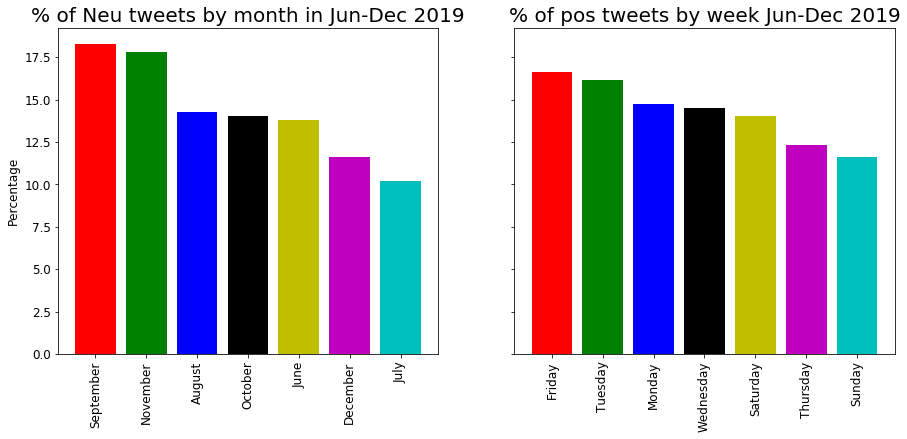

In [23]:
fig, [axes1, axes2] = plt.subplots(1, 2, figsize=(15,6), sharey=True)
neu_2019 = df_2019[df_2019.Sentiment == 'Neutral']
data = neu_2019["monthName"].value_counts(normalize=True)

axes1.bar(data.index, data*100, color=my_colors)
axes1.set_xticklabels(data.index, rotation=90)
axes1.set_ylabel('Percentage')
axes1.set_title('% of Neu tweets by month in Jun-Dec 2019')

data = neu_2019["dayName"].value_counts(normalize=True)
axes2.bar(data.index, data*100, color=my_colors)
axes2.set_xticklabels(data.index, rotation=90)
axes2.set_title('% of pos tweets by week Jun-Dec 2019')

plt.show()

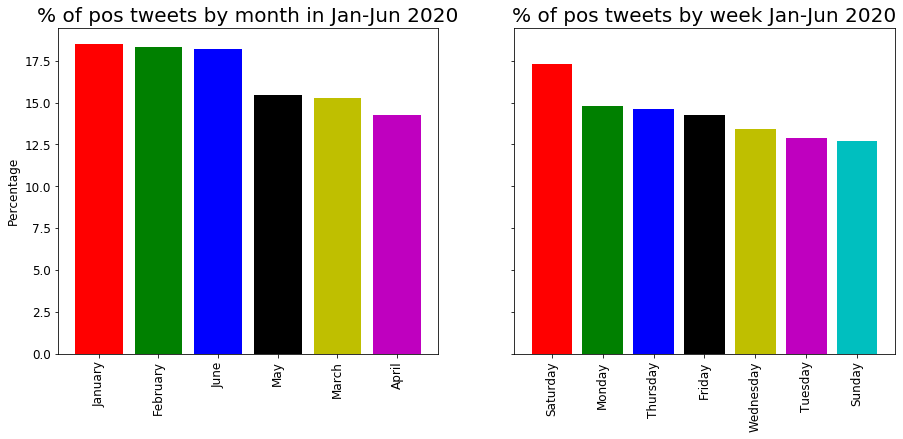

In [24]:
fig, [axes1, axes2] = plt.subplots(1, 2, figsize=(15,6), sharey=True)
pos_2020 = df_2020[df_2020.Sentiment == 'Positive']
data = pos_2020["monthName"].value_counts(normalize=True)

axes1.bar(data.index, data*100, color=my_colors)
axes1.set_xticklabels(data.index, rotation=90)
axes1.set_ylabel('Percentage')
axes1.set_title('% of pos tweets by month in Jan-Jun 2020')

data = pos_2020["dayName"].value_counts(normalize=True)
axes2.bar(data.index, data*100, color=my_colors)
axes2.set_xticklabels(data.index, rotation=90)
axes2.set_title('% of pos tweets by week Jan-Jun 2020')

plt.show()

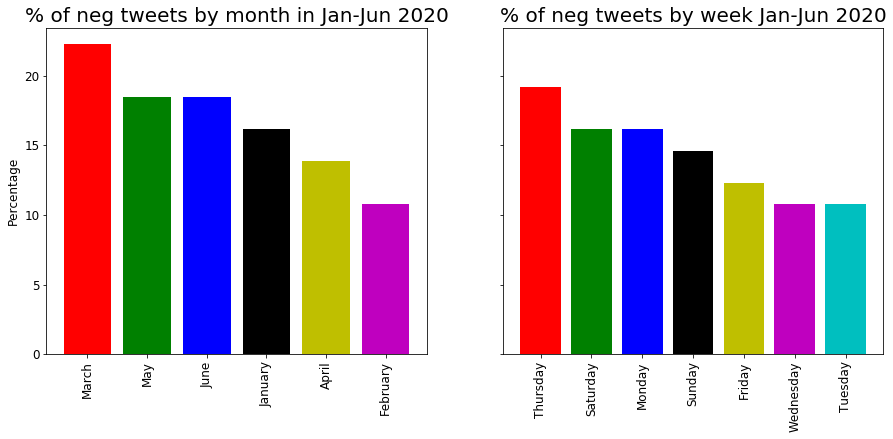

In [25]:
fig, [axes1, axes2] = plt.subplots(1, 2, figsize=(15,6), sharey=True)
neg_2020 = df_2020[df_2020.Sentiment == 'Negative']
data = neg_2020["monthName"].value_counts(normalize=True)

axes1.bar(data.index, data*100, color=my_colors)
axes1.set_xticklabels(data.index, rotation=90)
axes1.set_ylabel('Percentage')
axes1.set_title('% of neg tweets by month in Jan-Jun 2020')

data = neg_2020["dayName"].value_counts(normalize=True)
axes2.bar(data.index, data*100, color=my_colors)
axes2.set_xticklabels(data.index, rotation=90)
axes2.set_title('% of neg tweets by week Jan-Jun 2020')

plt.show()

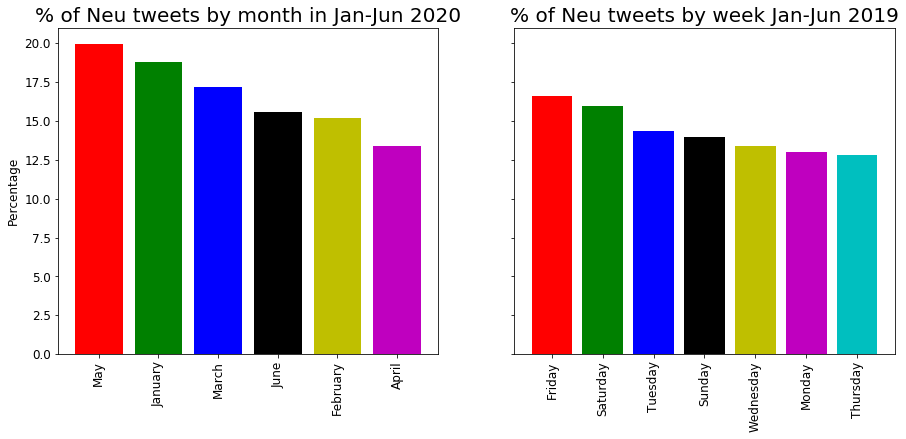

In [26]:
fig, [axes1, axes2] = plt.subplots(1, 2, figsize=(15,6), sharey=True)
neu_2020 = df_2020[df_2020.Sentiment == 'Neutral']
data = neu_2020["monthName"].value_counts(normalize=True)

axes1.bar(data.index, data*100, color=my_colors)
axes1.set_xticklabels(data.index, rotation=90)
axes1.set_ylabel('Percentage')
axes1.set_title('% of Neu tweets by month in Jan-Jun 2020')

data = neu_2020["dayName"].value_counts(normalize=True)
axes2.bar(data.index, data*100, color=my_colors)
axes2.set_xticklabels(data.index, rotation=90)
axes2.set_title('% of Neu tweets by week Jan-Jun 2019')

plt.show()

In [27]:
wordfreq = {}
for sentence in df['Text_lemmatized_str']:
    tokens = nltk.word_tokenize(sentence)
    for token in tokens:
        if token not in wordfreq.keys():
            wordfreq[token] = 1
        else:
            wordfreq[token] += 1

In [28]:
import operator
sorted_wordfreq=sorted(wordfreq.items(),key=operator.itemgetter(1),reverse=True)
sorted_wordfreq

[('pilani', 2052),
 ('bit', 2030),
 ('bitspilani', 562),
 ('campus', 346),
 ('institute', 299),
 ('goa', 267),
 ('science', 242),
 ('student', 241),
 ('birla', 233),
 ('technology', 219),
 ('amp', 210),
 ('university', 208),
 ('india', 197),
 ('alumnus', 184),
 ('research', 181),
 ('hyderabad', 178),
 ('year', 163),
 ('th', 153),
 ('day', 145),
 ('college', 140),
 ('read', 136),
 ('like', 134),
 ('bitsat', 133),
 ('education', 131),
 ('one', 122),
 ('iit', 115),
 ('admission', 115),
 ('engineering', 107),
 ('post', 103),
 ('u', 100),
 ('know', 99),
 ('job', 99),
 ('time', 98),
 ('startup', 98),
 ('sir', 98),
 ('fellow', 94),
 ('school', 92),
 ('bitsaa', 91),
 ('apply', 90),
 ('also', 88),
 ('congratulation', 88),
 ('get', 87),
 ('thanks', 85),
 ('team', 85),
 ('recruitment', 81),
 ('bitsians', 80),
 ('batch', 80),
 ('please', 79),
 ('new', 79),
 ('bitspilaniindia', 78),
 ('application', 78),
 ('news', 77),
 ('dr', 76),
 ('proud', 74),
 ('junior', 71),
 ('help', 70),
 ('would', 69),
 ('

In [30]:
df['hashtags'].str.replace('[\[,\]]', '')


0                                                     NaN
1       #criticalriver #criticalrivercare #bitspilani ...
2                                                     NaN
3                                                     NaN
4                            #Classof2020 #Graduation2020
5                                                     NaN
6                                                     NaN
7                 #BITSPilani #virtualconference #webinar
8       #COVID #COVID19 #bachelor #teenager #college #...
9                                                     NaN
10                                                    NaN
11                                                    NaN
12             #BITSPilani #BITSians #BITSAlumniRelations
13             #BITSPilani #BITSians #BITSAlumniRelations
14                           #BITSPilani #Alumnirelations
15                                                    NaN
16                                                    NaN
17            

In [32]:
df['hashtags']=df['hashtags'].astype(str)

In [33]:
hashtagfreq = {}
for sentence in df['hashtags']:
    tokens = nltk.word_tokenize(sentence)
    for token in tokens:
        if token not in hashtagfreq.keys():
            hashtagfreq[token] = 1
        else:
            hashtagfreq[token] +=1

In [34]:
sorted_hashtag=sorted(hashtagfreq.items(),key=operator.itemgetter(1),reverse=True)
sorted_hashtag

[('#', 3239),
 ('nan', 1656),
 ('BITSPilani', 269),
 ('bitspilani', 101),
 ('BITSians', 40),
 ('BITS', 38),
 ('BITSAlumniRelations', 30),
 ('BITSAT', 28),
 ('Hyderabad', 19),
 ('rajasthanpalaces', 18),
 ('JRF', 15),
 ('bits', 15),
 ('education', 15),
 ('bitsgoa', 15),
 ('BITSAT2020', 12),
 ('BitsPilani', 12),
 ('stayhome', 12),
 ('Goa', 12),
 ('Pilani', 11),
 ('bgm2020', 11),
 ('HCLTechBee', 10),
 ('HCL', 10),
 ('twitter', 10),
 ('instagram', 10),
 ('startups', 10),
 ('BITSAlumni', 10),
 ('bitsaa', 10),
 ('Students', 9),
 ('royalrajasthan', 9),
 ('rajasthantourism', 9),
 ('rajasthaniculture', 9),
 ('cultureofrajasthan', 9),
 ('facebook', 9),
 ('bitsadmission', 9),
 ('bitsat', 9),
 ('India', 9),
 ('MBA', 9),
 ('startup', 9),
 ('BGM2020', 9),
 ('HallaToHogaHi', 9),
 ('college', 8),
 ('IITMadras', 8),
 ('HCLTSS', 8),
 ('pilani', 8),
 ('entrepreneur', 8),
 ('BITSian', 8),
 ('goa', 8),
 ('IITKharagpur', 8),
 ('IITKanpur', 8),
 ('BITSAA', 8),
 ('BOSM19', 8),
 ('COVID19', 7),
 ('HCLTechnologi

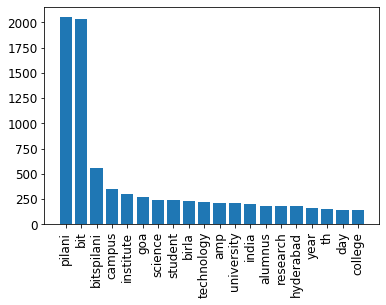

In [35]:
most_freqword = sorted_wordfreq[0:20]
plt.bar(range(len(most_freqword)), [val[1] for val in most_freqword], align='center')
plt.xticks(range(len(most_freqword)), [val[0] for val in most_freqword])
plt.xticks(rotation=90)
plt.show()

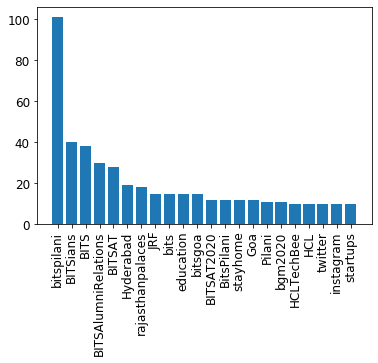

In [36]:
most_freqht = sorted_hashtag[3:25]
plt.bar(range(len(most_freqht)), [val[1] for val in most_freqht], align='center')
plt.xticks(range(len(most_freqht)), [val[0] for val in most_freqht])
plt.xticks(rotation=90)
plt.show()